## First and formost we want to import our dataset from our external directory:  (Train & Test)

In [17]:
import tensorflow
import keras

load_train = tensorflow.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Lenovo\Desktop\New folder\Deep Learning\Projects\Dog vs Cat Prediction\train',
    labels = 'inferred',
    label_mode = 'int', # Assiging 0 to cat and 1 to dog
    batch_size = 32,
    image_size = (256, 256)
)

load_test = tensorflow.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Lenovo\Desktop\New folder\Deep Learning\Projects\Dog vs Cat Prediction\test',
    labels = 'inferred',
    label_mode = 'int', # Assiging 0 to cat and 1 to dog
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Normalizing our data from 0 to 255.

In [18]:
# Now we want to normalize our data because our train_data and test_data in loaded in numpy data but we want to get a normalized data between 0 to 255.

def process(image, label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_data = load_train.map(process)
test_data = load_test.map(process)

### Creating strucure for our model.

In [19]:
# Creating our model

from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

#### As you can see we have 14M plus trainable parameters.

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train our model.

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

## So in my computer, I have do not have any GPU so it takes 5 hours to train

#### You can use your GPU for this high computational calculations or use google colab if you don't have that!

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuray'], color='blue', label='test')
plt.legend()
plt.plot()

### This is the clear indication of overfitting that's why we add some dropout and batch normalization to avoiding overtting.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.plot()

# Prediction!

In [24]:
import cv2

In [30]:
# test_img = cv2.imread('cat.jpg')
test_img = cv2.imread('dog.jpg')

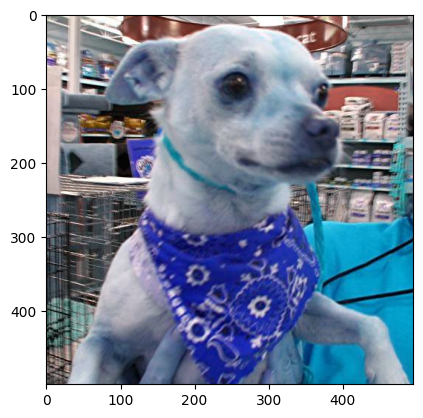

In [31]:
import matplotlib.pyplot as plt

plt.imshow(test_img)

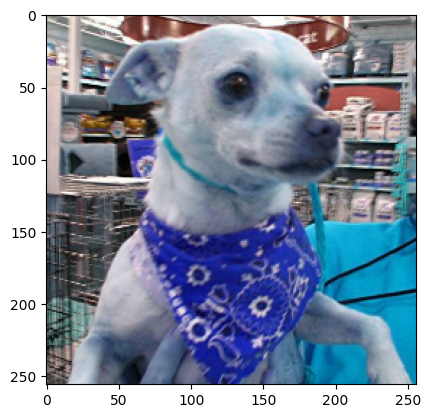

In [34]:
test_img = cv2.resize(test_img, (256,256))
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

# So as you can clearly see that our model predict this image and that is dog (1).